In [581]:
import warnings
warnings.filterwarnings("ignore")

In [831]:
import pandas as pd 
import numpy as np 
import matplotlib as mpt
import seaborn as sns
import datetime as dt 
import warnings
import os
import sklearn as skl
import matplotlib.pyplot as plt

data = pd.read_excel("Bureau/AURORA/Data-Former.xlsx", skiprows = range(5)).set_index('Dates')
data_pct = pd.read_excel('Bureau/AURORA/Data-StdPct.xlsx', skiprows= range(4)).set_index('Dates')
data_pct = data_pct.iloc[:,1:]
data_fold = [data, data_pct]
features = ['prices', 'vol', 'skewness', 'kurtosis', 'correl']
asset = ['eq','bds']
for _ in data_fold:
    _.rename(columns = lambda x: x.lower(), inplace=True)
    
data['eq,returns,all'] = data['eq,prices,all'].pct_change()
data['bds,returns,all'] = data['bds,prices,all'].pct_change()
print('\nData fields: ', list(data.columns))
print('\nData_pct fields: ', list(data_pct.columns))

### Reminder - Select columns with regex
#data.filter(regex = '^[beginning of columns you want]', axis=1)
#data.filter(regex = '[end of what you want]$', axis=1)
#data.filter(like = '[contains]', axis=1)
# Inverse regex (does not contain) = ^((?![to_exclude]).)*$


Data fields:  ['eq,prices,all', 'bds,prices,all', 'eq,vol,5', 'eq,vol,10', 'eq,vol,21', 'eq,vol,42', 'eq,vol,63', 'eq,vol,126', 'eq,vol,252', 'eq,vol,512', 'bds,vol,5', 'bds,vol,10', 'bds,vol,21', 'bds,vol,42', 'bds,vol,63', 'bds,vol,126', 'bds,vol,252', 'bds,vol,512', 'all,correl,2w', 'all,correl,1m', 'all,correl,2m', 'all,correl,3m', 'all,correl,6m', 'all,correl,1y', 'all,correl,3y', 'all,correl,5y', 'eq,trendiness,2w', 'eq,trendiness,1m', 'eq,trendiness,2m', 'eq,trendiness,3m', 'eq,trendiness,6m', 'eq,trendiness,1y', 'eq,trendiness,3y', 'eq,trendiness,5y', 'bds,trendiness,2w', 'bds,trendiness,1m', 'bds,trendiness,2m', 'bds,trendiness,3m', 'bds,trendiness,6m', 'bds,trendiness,1y', 'bds,trendiness,3y', 'bds,trendiness,5y', 'eq,skewness,3m', 'eq,skewness,6m', 'eq,skewness,1y', 'eq,skewness,3y', 'eq,skewness,5y', 'bds,skewness,3m', 'bds,skewness,6m', 'bds,skewness,1y', 'bds,skewness,3y', 'bds,skewness,5y', 'eq,kurtosis,3m', 'eq,kurtosis,6m', 'eq,kurtosis,1y', 'eq,kurtosis,3y', 'eq,kurt

-- SUMMARY STATS --
Original Dset size (15110, 64) 



,"eq,vol,5","eq,vol,10","eq,vol,21","eq,vol,42","eq,vol,63","eq,vol,126","eq,vol,252","eq,vol,512","bds,vol,5","bds,vol,10","bds,vol,21","bds,vol,42","bds,vol,63","bds,vol,126","bds,vol,252","bds,vol,512"
count,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000,15109.000000
mean,13.399941,13.642787,13.886267,14.119131,14.258169,14.489514,14.686047,14.711638,5.799660,5.891400,5.965732,6.023137,6.052937,6.099452,6.132317,6.117967
std,8.127178,7.710489,7.253535,6.763218,6.434149,5.790494,5.060286,4.433446,3.329165,3.161745,3.013340,2.886033,2.813541,2.686410,2.558773,2.449977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.586158,9.082186,9.530012,9.881928,10.068947,10.550112,11.351783,12.080678,3.737346,3.958671,4.127602,4.249265,4.309860,4.455249,4.767397,4.822977
50%,11.495369,11.870643,12.227557,12.451559,12.826868,13.438898,13.710127,14.168526,5.165517,5.360114,5.502096,5.648795,5.740498,5.747544,5.792000,6.026117
75%,15.895698,16.070864,16.240391,16.601508,16.739874,16.636016,17.156586,17.228161,7.137072,7.136090,7.141343,7.120623,7.094493,7.118087,7.101451,7.472792
max,122.541337,93.700674,70.010640,59.951910,53.215911,42.324350,34.248382,27.712586,28.131761,23.781421,20.278428,17.835911,16.845345,15.047188,13.349096,11.727943


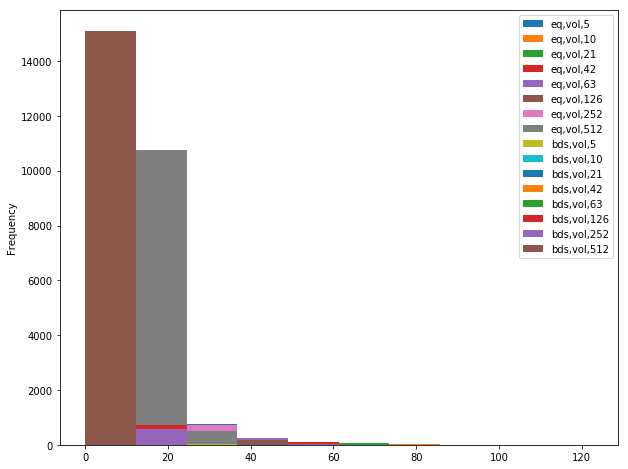

In [528]:
### Quick EDA
# Rq1: sur les max eq- 75% à environ 16% across half lives, mais par contre max à 122, 93, 70, 59, 53, 42...
# Sur les bonds on est plus à 5% across half lives avec rien de fou niveau max 
# Rq2: de la vol à 0? 
print('-- SUMMARY STATS --')
print('Original Dset size', data.shape, '\n')
data.filter(like = 'vol', axis=1).plot(kind = 'hist', figsize = (10,8))
data.filter(like = 'vol', axis=1).describe()

In [529]:
print('Normalized Dset Size', data_pct.shape, '\n')
data_pct.describe()

Normalized Dset Size (14067, 39) 



,"eq, prices, all","bds, prices, all","eq,vol,5","eq,vol,10","eq,vol,21","eq,vol,42","eq,vol,63","eq,vol,126","eq,vol,252","eq,vol,average",...,"eq,trendiness,6m","eq,trendiness,1y","eq,trendiness,average","bds,trendiness,2w","bds,trendiness,1m","bds,trendiness,2m","bds,trendiness,3m","bds,trendiness,6m","bds,trendiness,1y","bds,trendiness,average"
count,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,...,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000
mean,110.237290,162.446362,0.215041,0.232756,0.250105,0.273542,0.290116,0.327075,0.396082,0.283531,...,-0.083125,-0.056146,-0.078562,-0.110865,-0.105083,-0.098458,-0.089332,-0.073569,-0.076399,-0.092284
std,53.836489,82.992285,0.548010,0.537847,0.529025,0.523660,0.520715,0.512464,0.479751,0.481028,...,0.563327,0.557215,0.328038,0.536324,0.543863,0.543522,0.548921,0.546168,0.518989,0.322770
min,38.695139,57.927717,-1.000000,-0.984000,-0.972000,-0.960000,-0.956000,-0.894000,-1.000000,-0.902571,...,-1.000000,-1.000000,-0.865000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.870667
25%,67.795583,90.081025,-0.216000,-0.182000,-0.160000,-0.132000,-0.126000,-0.076000,0.071000,-0.058571,...,-0.566000,-0.536000,-0.324167,-0.573000,-0.574000,-0.563000,-0.562000,-0.536000,-0.502000,-0.331667
50%,96.262703,144.310481,0.292000,0.302000,0.314000,0.362000,0.390000,0.438000,0.512000,0.346000,...,-0.122000,-0.056000,-0.123000,-0.134000,-0.134000,-0.126000,-0.122000,-0.084000,-0.082000,-0.140000
75%,136.032812,213.119387,0.704000,0.718000,0.730000,0.738000,0.746000,0.782000,0.808000,0.694000,...,0.384000,0.380000,0.134333,0.336000,0.342000,0.340000,0.374000,0.376000,0.344000,0.099667
max,291.671262,357.339312,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.984000,0.972000,0.998000,1.000000,1.000000,1.000000,1.000000,0.960333


Showing what? (beginning, all features, timeframe) beginning
Choice? tuple format: eq/bds, vol... bds,vol


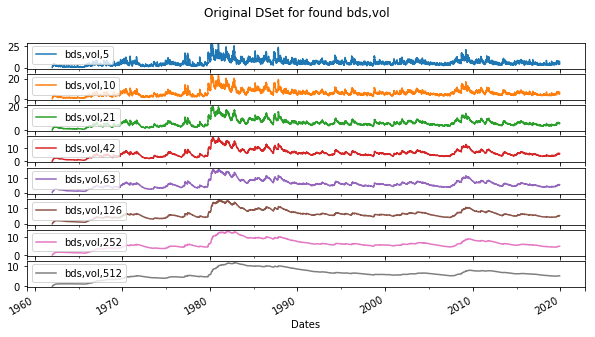

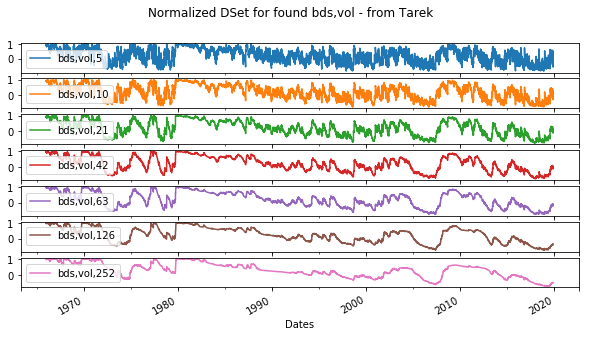

In [730]:
# Plot stuff
show = input('Showing what? (beginning, all features, timeframe)')
if show == 'beginning':
    show = input('Choice? tuple format: eq/bds, vol...')
    data.filter(regex = '^'+show, axis= 1).plot(subplots= True, figsize = (10,5))
    plt.suptitle('Original DSet for found ' + show)
    try: 
        data_pct.filter(regex = '^'+show,axis = 1).plot(subplots = True, figsize = (10,5))
        plt.suptitle('Normalized DSet for found '+show+' - from Tarek')
    except TypeError: 
        pass
    
elif show == 'features':
    for _ in features: 
        data.filter(like = _, axis= 1).plot(subplots= True, figsize = (10,5))
        plt.suptitle('Original DSet for ' + _)
        try: 
            data_pct.filter(like = _,axis = 1).plot(subplots = True, figsize = (10,5))
            plt.suptitle('Normalized DSet for '+_+' - from Tarek')
        except TypeError:
            pass
elif show == 'timeframe':
    show = input('Choice?')
    data.filter(regex = show+'$', axis= 1).plot(subplots= True, figsize = (10,5))
    plt.suptitle('Original DSet for found'+show+' timeframe')
    try:
        data_pct.filter(regex = show+'$',axis = 1).plot(subplots = True, figsize = (10,5))
        plt.suptitle('Normalized DSet for found'+ show +'timeframe - from Tarek')
    except TypeError:
        pass
else:
    pass

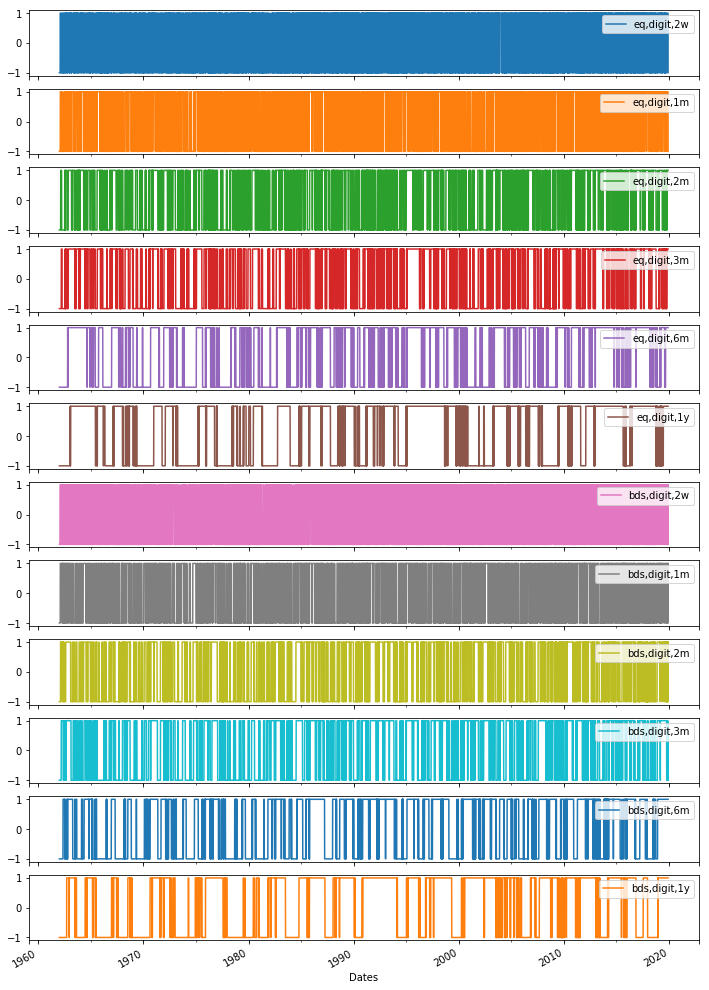

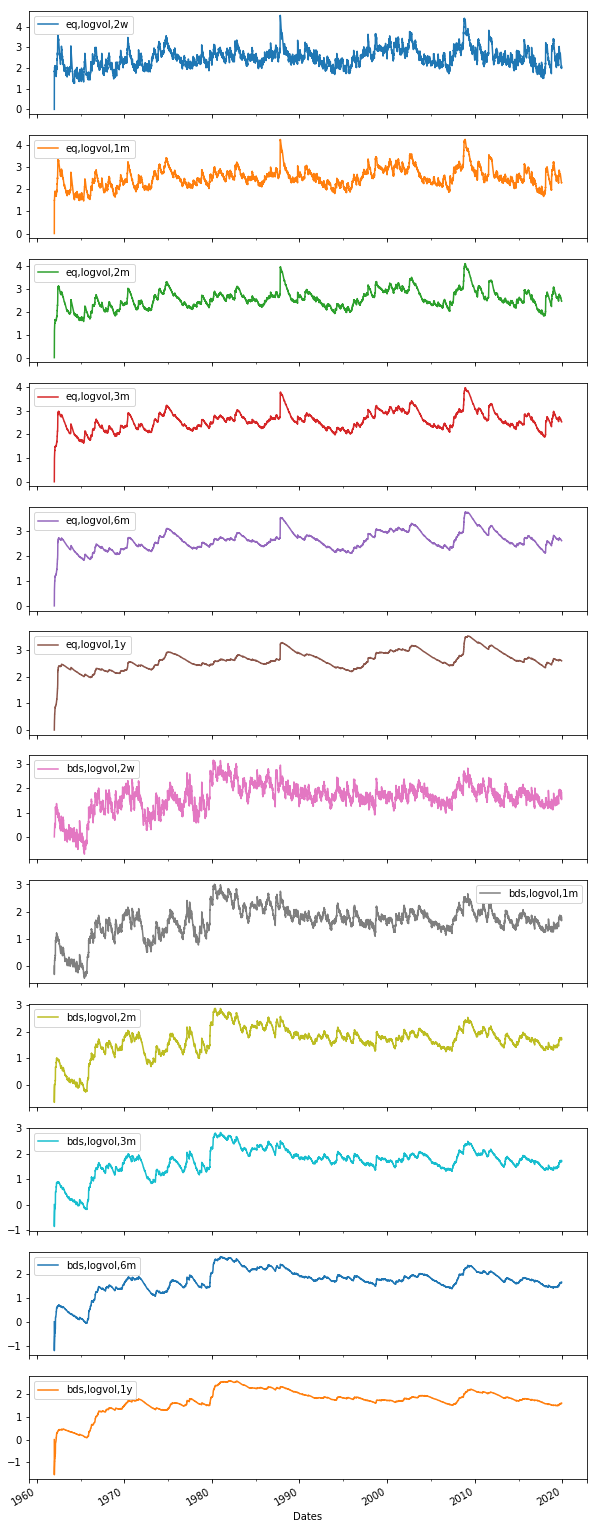

In [941]:
### A partir de data: création des price returns over period 2w, 1m, 2m, 3m, 6m, 1y 
### Duplicates as digital momentum (indicatrice)
def total_return(series): 
    return (series + 1).prod() - 1

periods = ['2w', '1m', '2m', '3m', '6m', '1y']
to_days = ['10', '21', '42', '63', '126', '252']
pds_to_days = list(zip(periods,to_days))
for _ in asset: 
    i = 0
    while i < len(periods): 
        data[_+',returns,'+pds_to_days[i][0]] = data[_+',returns,all'].rolling(str(pds_to_days[i][1])+'D').apply(lambda x: total_return(x))
        data[_+',digit,'+pds_to_days[i][0]] = data[_+',returns,'+pds_to_days[i][0]].apply(lambda x: 1 if x>0 else -1)
        data[_+',logvol,'+periods[i]] = np.log(data[_+',vol,'+to_days[i]])
        i = i+1

data.at['1962-01-04','eq,logvol,2w':'bds,logvol,1y'] = 0 #Removing -inf before normalizing
data.filter(like='digit').plot(subplots = True, figsize = (12,19))
plt.show()
plt.close()
data.filter(like='logvol').plot(subplots=True, figsize = (10,30))
plt.show()

In [942]:
data.loc[:, 'eq,logvol,2w':'bds,logvol,1y']

,"eq,logvol,2w","eq,logvol,1m","eq,logvol,2m","eq,logvol,3m","eq,logvol,6m","eq,logvol,1y","bds,logvol,2w","bds,logvol,1m","bds,logvol,2m","bds,logvol,3m","bds,logvol,6m","bds,logvol,1y"
Dates,,,,,,,,,,,,
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-01-05,1.747875,1.385906,1.043442,0.842081,0.496881,0.150995,0.048555,-0.313415,-0.655879,-0.857240,-1.202440,-1.548326
1962-01-08,1.859092,1.510745,1.174512,0.975235,0.632121,0.287278,0.059976,-0.285412,-0.620322,-0.819162,-1.161841,-1.506466
1962-01-09,1.824669,1.494462,1.166475,0.969946,0.629580,0.286112,0.193170,-0.143725,-0.474621,-0.672102,-1.013411,-1.357348
1962-01-10,1.808835,1.495023,1.174541,0.980521,0.642668,0.300457,0.292028,-0.036514,-0.363436,-0.559568,-0.899515,-1.242767
1962-01-11,1.850759,1.546203,1.230245,1.037775,0.701492,0.360074,0.285459,-0.027613,-0.347436,-0.541192,-0.878760,-1.220819
1962-01-12,1.840599,1.550832,1.241735,1.051569,0.717600,0.377342,0.250967,-0.043972,-0.355552,-0.546560,-0.881380,-1.222066
1962-01-15,1.816046,1.542776,1.241261,1.053634,0.722208,0.383224,0.335148,0.041513,-0.268810,-0.459310,-0.793578,-1.133972


Index(['eq,vol,5', 'eq,vol,10', 'eq,vol,21', 'eq,vol,42', 'eq,vol,63',
       'eq,vol,126', 'eq,vol,252', 'eq,vol,512', 'bds,vol,5', 'bds,vol,10',
       'bds,vol,21', 'bds,vol,42', 'bds,vol,63', 'bds,vol,126', 'bds,vol,252',
       'bds,vol,512', 'eq,returns,all', 'bds,returns,all', 'eq,returns,2w',
       'eq,returns,1m', 'eq,returns,2m', 'eq,returns,3m', 'eq,returns,6m',
       'eq,returns,1y', 'bds,returns,2w', 'bds,returns,1m', 'bds,returns,2m',
       'bds,returns,3m', 'bds,returns,6m', 'bds,returns,1y', 'eq,logvol,2w',
       'eq,logvol,1m', 'eq,logvol,2m', 'eq,logvol,3m', 'eq,logvol,6m',
       'eq,logvol,1y', 'bds,logvol,2w', 'bds,logvol,1m', 'bds,logvol,2m',
       'bds,logvol,3m', 'bds,logvol,6m', 'bds,logvol,1y', 'eq,trendiness,2w',
       'eq,trendiness,1m', 'eq,trendiness,2m', 'eq,trendiness,3m',
       'eq,trendiness,6m', 'eq,trendiness,1y', 'eq,trendiness,3y',
       'eq,trendiness,5y', 'bds,trendiness,2w', 'bds,trendiness,1m',
       'bds,trendiness,2m', 'bds,trendines

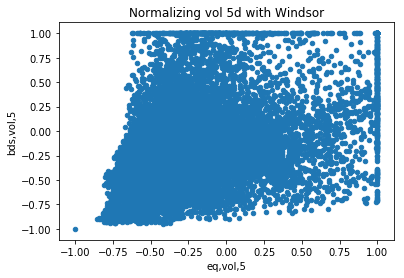

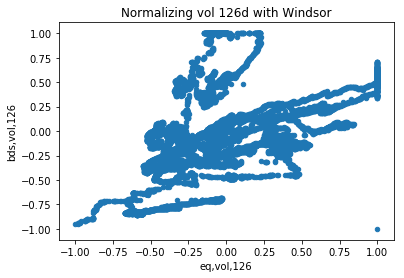

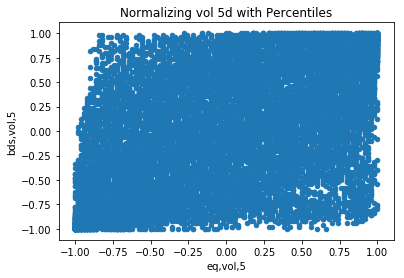

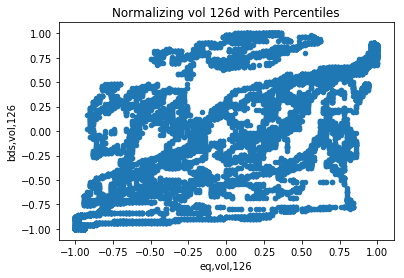

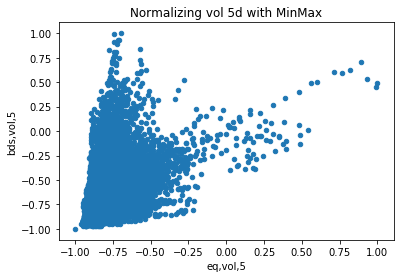

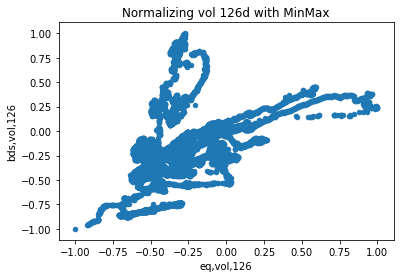

In [944]:
# Multiple Datasets for normalization 
# We could standardize with StandardScaler but data isn't normal 
# MinMax: sensitive to outliers, but try anyway. 
# RobustScaler: robust to outliers (removes median and scales data according to quantile ranges)
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# Robust Scaler = scaling using median and quantiles - substracts the median to all obs then divide by the interquartile differences (75th - 25th) 

#On prévoit 3 datasets concurrents: 
#- Rescaling everywhere avec minmax 
#- Percentile + rescaling
#- Windsor + rescaling

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler

#Separating correl/trendiness 
correl_data = data.loc[:,'all,correl,1m':'all,correl,5y'].copy()
digit_data = data.filter(like = 'digit', axis=1).copy()
trendiness_data = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(data.loc[:,'eq,trendiness,2w': 'bds,trendiness,5y']), columns = data.loc[:,'eq,trendiness,2w': 'bds,trendiness,5y'].columns, index=data.index)

# Dataset to normalize
norm = {}
to_normalize_col = data.filter(regex='returns|vol|logvol').columns
to_normalize = data.loc[:,to_normalize_col].copy()
variants= ['Windsor', 'Percentiles', 'MinMax']
for _ in variants: 
    norm[_] = to_normalize.copy()

#With truncature (max = 3stdev)
def windsor(series, std, mean, times):
    if abs((series-mean)/std) >= times and series >= 0: 
        return mean+times*std
    elif abs((series-mean)/std) >= times and series <= 0: 
        return mean-times*std
    else:
        return series
    
for _ in to_normalize.columns: 
    norm['Windsor'][_] = norm['Windsor'][_].apply(lambda x: windsor(x, to_normalize[_].std(), to_normalize[_].mean(),2.5))
    norm['Percentiles'][_] = pd.qcut(norm['Percentiles'][_], q= 101, precision = 2, labels=False, retbins=False) 

#Bringing everything between [-1:1]
for _ in norm.keys():
    norm[_] = pd.DataFrame(MinMaxScaler(feature_range=(-1,1)).fit_transform(norm[_]),columns = to_normalize_col, index=data.index)
    norm[_].plot.scatter(x = 'eq,vol,5', y = 'bds,vol,5', title =  'Normalizing vol 5d with '+_)
    norm[_].plot.scatter(x = 'eq,vol,126', y='bds,vol,126', title = 'Normalizing vol 126d with '+_)

for _ in norm.keys(): 
    try: 
        norm[_] = norm[_].join(trendiness_data)
        norm[_] = norm[_].join(correl_data)
        norm[_] = norm[_].join(digit_data)
        print(norm[_].columns)
    except ValueError:
        pass
    
#Je laisse les 126d parce que c'est artistique
#Expanding windows says what??? 

Count of misclassified variables: 1038

Extract


,Tk Version,Percentiles
Dates,,
1966-01-03,-0.760,-0.98
1966-01-04,-0.764,-0.98
1966-01-05,-0.750,-0.98
1966-01-06,-0.758,-0.98
1966-01-07,-0.778,-0.98
1966-01-10,-0.782,-0.98
1966-01-11,-0.790,-0.98
1966-01-12,-0.794,-0.98
1966-01-13,-0.802,-0.98


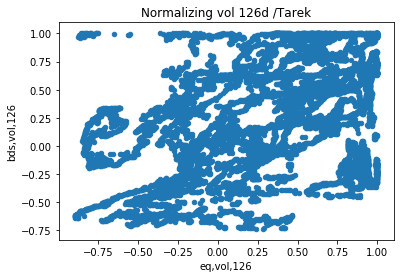

In [834]:
# Check on Tarek's data
# Note that the dataset doesn't start at the same date
for _ in norm.keys(): 
    norm[_] = norm[_].loc['1966-01-03':, :].copy() 
    if norm[_].isna().sum().sum() != 0: 
        print('Null data found in: ', _) #coming from 5y estimates (correl, trendiness) - columns shall be dropped
    norm[_] = norm[_].filter(regex = '^((?!5y).)*$', axis=1)
    
data_pct = data_pct.loc[:, 'eq,vol,5':].copy()
data_pct = data_pct.filter(regex= '^((?!average).)*$',axis=1).copy()
norm['Tk'] = data_pct
norm['Tk'].plot.scatter(x = 'eq,vol,126', y='bds,vol,126', title = 'Normalizing vol 126d /Tarek')

# What happened with 126 days?
comp_df = pd.DataFrame(data = {'Tk Version': norm['Tk']['eq,vol,126'],
                               'Percentiles': norm['Percentiles']['eq,vol,126']},index = data.index)
comp_df.dropna(axis=0, inplace=True)

print('Count of misclassified variables:', comp_df[abs(comp_df.Percentiles-comp_df['Tk Version'])>=1].count()[0])
print('\nExtract')
comp_df.head(10)

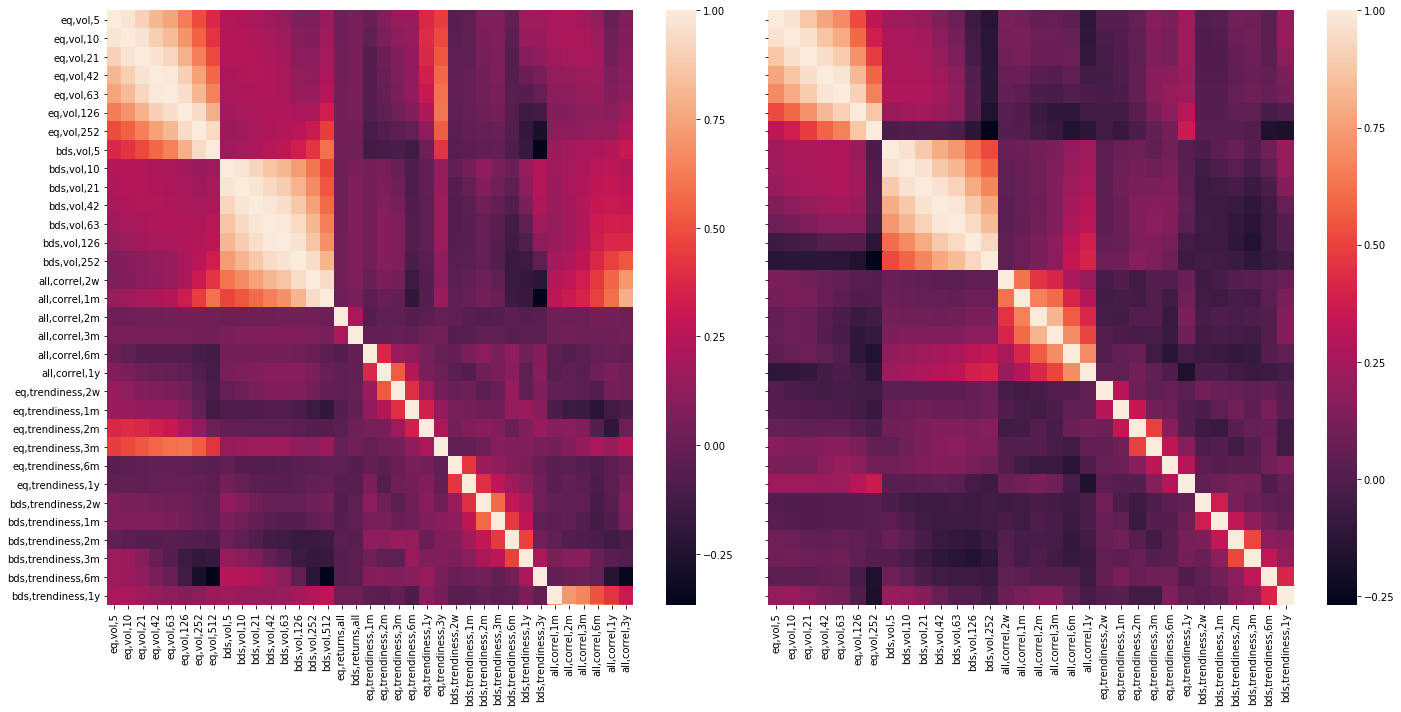

In [841]:
#Puis sortir les mats sur la période actuelle on splitte le dataset original en 4 avec périodes de 15 ans. 
# Qu'est ce qui fait une bonne matrice de var-covar? 1/ Dropper les duplicates 2/ Une bonne période d'estimation

norm_c = {} 
corr = {}
pds = ['1m', '2m','3m', '6m', '1y']
wds = [] 

#Honestly il est déjà 11pm
for _ in norm.keys(): 
    norm_c[_] = norm[_].iloc[:int(np.floor(len(data.index)/4)),:] #About 15Y
    assert(norm_c[_].isna().sum().sum() != 0, 'Some data is missing, correls won\'t turn out right')


# Pour toutes les variantes, correls sur les périodes & les windows
for _ in norm_c.keys(): 
    corr[_] = norm_c[_].corr()

#Pour l'exemple à ne pas faire: correl sur MinMax v correl sur percentiles & else
#La différence n'est pas frappante mais il y a des éléments incohérents
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))
sns.heatmap(corr['MinMax'], cbar = True, annot = False, ax=ax1)
sns.heatmap(corr['Tk'], cbar = True, annot = False,  ax=ax2)
plt.tight_layout()


In [ ]:
'''
Et si on voulait split les features? Quick & Dirty
corr['Tk'].columns='eq,vol,5,2w', 'eq,vol,10,2w', 'eq,vol,21,1m', 'eq,vol,42,2m', 'eq,vol,63,3m',\
       'eq,vol,126,1y', 'eq,vol,252,1y', 'bds,vol,5,2w', 'bds,vol,10,2w', 'bds,vol,21,1m',\
       'bds,vol,42,2m', 'bds,vol,63,3m', 'bds,vol,126,1y', 'bds,vol,252,1y',\
       'all,correl,2w', 'all,correl,1m', 'all,correl,2m', 'all,correl,3m',\
       'all,correl,6m', 'all,correl,1y', 'eq,trendiness,2w',\
       'eq,trendiness,1m', 'eq,trendiness,2m', 'eq,trendiness,3m',\
       'eq,trendiness,6m', 'eq,trendiness,1y', 'bds,trendiness,2w',\
       'bds,trendiness,1m', 'bds,trendiness,2m', 'bds,trendiness,3m',\
       'bds,trendiness,6m', 'bds,trendiness,1y'
       
for _ in norm_c.keys(): 
    for pdx in pds: 
        corr[_+','+pdx] = norm_c[_].filter(like=pdx, axis=1).corr() 
'''

-- PCA --


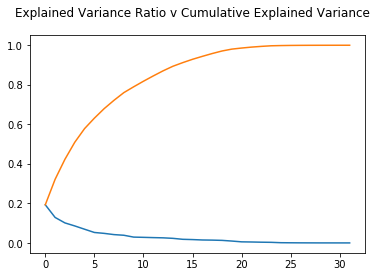


PCA Explained Variance -- 
 [1.56997014e+00 1.04917365e+00 8.24034944e-01 6.99651206e-01
 5.63995479e-01 4.30455663e-01 3.92967312e-01 3.42507638e-01
 3.15622237e-01 2.39553937e-01 2.29706865e-01 2.18745664e-01
 2.09573079e-01 1.88299380e-01 1.49021516e-01 1.37727375e-01
 1.21109970e-01 1.15554925e-01 1.04933950e-01 7.70136234e-02
 4.44806515e-02 3.84233486e-02 2.98926434e-02 2.43284189e-02
 9.13390865e-03 5.73889906e-03 3.24273687e-03 1.98563908e-03
 8.63931657e-04 7.42821951e-04 4.25904628e-04 2.97558159e-04]

Eigenvalues Post Ajustement -- 
 [1.52090857e+00 1.01638697e+00 7.98283852e-01 6.77787106e-01
 5.46370621e-01 4.17003924e-01 3.80687084e-01 3.31804274e-01
 3.05759042e-01 2.32067876e-01 2.22528526e-01 2.11909862e-01
 2.03023920e-01 1.82415024e-01 1.44364594e-01 1.33423394e-01
 1.17325283e-01 1.11943833e-01 1.01654764e-01 7.46069476e-02
 4.30906311e-02 3.72226189e-02 2.89584983e-02 2.35681558e-02
 8.84847401e-03 5.55955847e-03 3.14140134e-03 1.92358786e-03
 8.36933793e-04 7.196

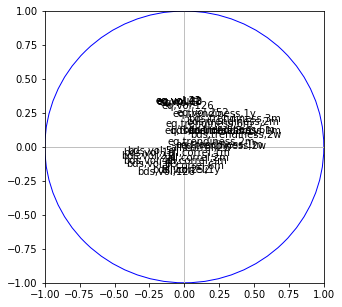

In [724]:
### PostNormalization : faire tourner des ACPs statiques sur des subsets de features avec lookback periods similaires
### storer les résultats(eigenvectors, values, variances expliquées) 
### puis représentation des données dans un espace factoriel approprié 
# Je me dis juste qu'on a une matrice de covariance assez dégueux, donc normal que le résultat ne ressemble à rien 

from sklearn.decomposition import PCA
pcbook={}
varbook = {}

# Tests on PCA
# Get new coordinates + explained_variance_ratio + eigenvalues + eigenvectors
pca = PCA().fit(norm_c['Tk'])
coord = pd.DataFrame(data = pca.transform(norm_c['Tk'])) #storing coordinates
eigenval = (32-1)/32*pca.explained_variance_
eigenvectors = pca.components_

print('-- PCA --')
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.suptitle('Explained Variance Ratio v Cumulative Explained Variance')
plt.show()
print('\nPCA Explained Variance -- \n', pca.explained_variance_)
print('\nEigenvalues Post Ajustement -- \n', eigval) 

#Get correlation between all features/PCs 
corr_feat = np.zeros((32,32))
for k in range(32):
    corr_feat[:,k] = pca.components_[k,:] * np.sqrt(eigenval)[k] #Stockage des correlations features/PCs. 
    #Note: pca.components_ stocke les eigenvectors en ligne

# Cercle de Correl
df_corrfeat = pd.DataFrame({'Features':norm_c['Tk'].columns,'Corr_C1':corr_feat[:,0],'Corr_C2':corr_feat[:,1]})
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for _ in range(32):
    plt.annotate(norm_c['Tk'].columns[_],(corr_feat[_,0],corr_feat[_,1]))
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(plt.Circle((0,0),1,color='blue',fill=False))